In [25]:
clc;
clear;
close all;

## 数据可视化

In [26]:
load('ex6data1.mat')
whos

Variables in the current scope:

   Attr Name        Size                     Bytes  Class
   ==== ====        ====                     =====  ===== 
        X          51x2                        816  double
        y          51x1                        408  double

Total is 153 elements using 1224 bytes



In [27]:
function plotData(X, y)
    pos = find(y == 1);
    neg = find(y == 0);
    hold on;
    plot(X(pos, 1), X(pos, 2), 'r+', 'markersize', 3)
    plot(X(neg, 1), X(neg, 2), 'ko', 'markersize', 3)
    hold off;
end

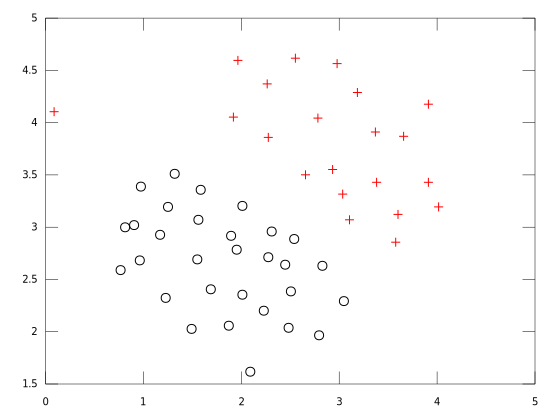

In [28]:
plotData(X, y)

## SVM Train

svmTrain 的实现还是按 SMO 算法来实现的。有时间要重新实现一下。

### C = 1 with outlier


Training ... Done! 



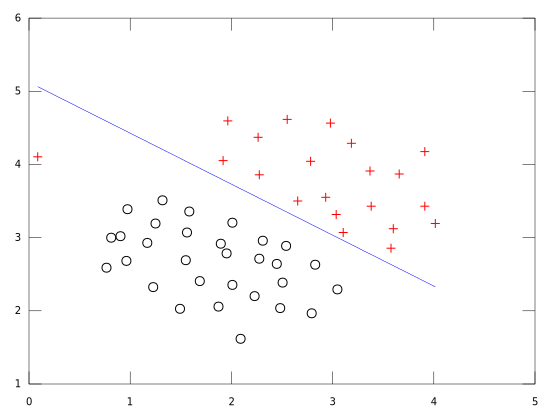

In [29]:
C = 0.1;
model = svmTrain(X, y, C, @linearKernel, 1e-3, 20);
visualizeBoundaryLinear(X, y, model);


Training ... Done! 



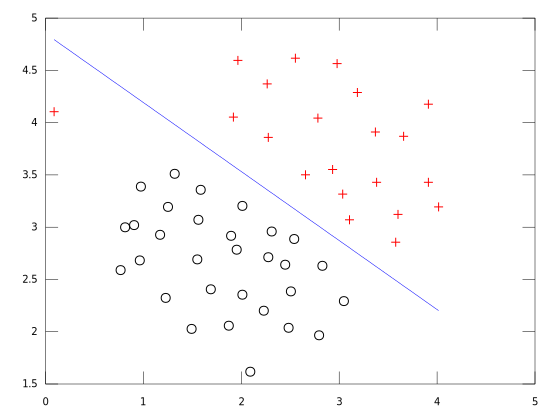

In [31]:
C = 1;
model = svmTrain(X, y, C, @linearKernel, 1e-3, 20);
visualizeBoundaryLinear(X, y, model);


Training ... Done! 



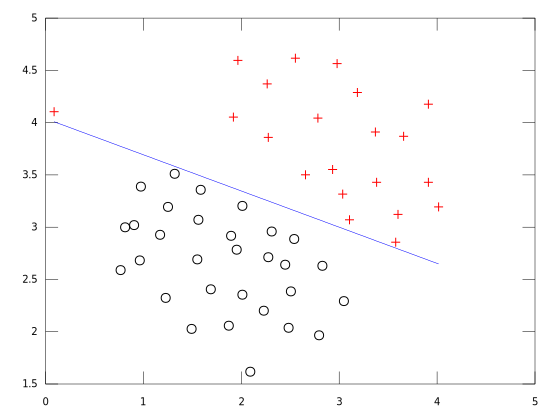

In [32]:
### C = 100 with outlier
C = 100;
model = svmTrain(X, y, C, @linearKernel, 1e-3, 20);
visualizeBoundaryLinear(X, y, model);


Training ... Done! 



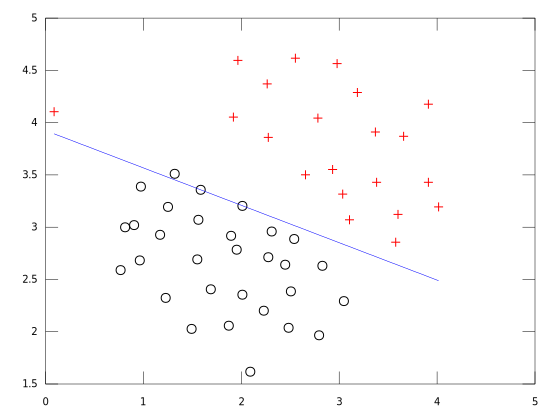

In [33]:
C = 1000;
model = svmTrain(X, y, C, @linearKernel, 1e-3, 20);
visualizeBoundaryLinear(X, y, model);

## SVM Train 02

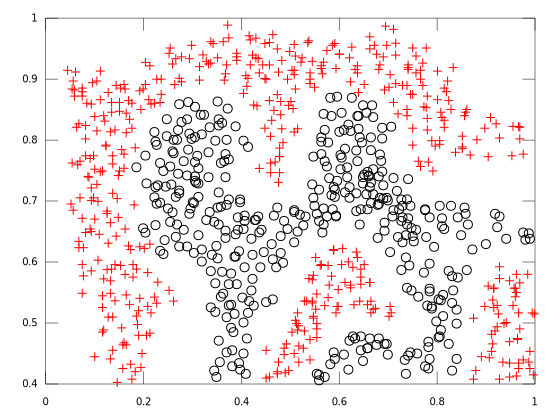

In [34]:
load('ex6data2.mat')
plotData(X, y);

In [35]:
% Guassian Kernal
function sim = guassianKernel(x1, x2, sigma)
    sim = exp(- (sum((x1 - x2) .^ 2))/(2 * sigma ^ 2));
end


Training ... Done! 



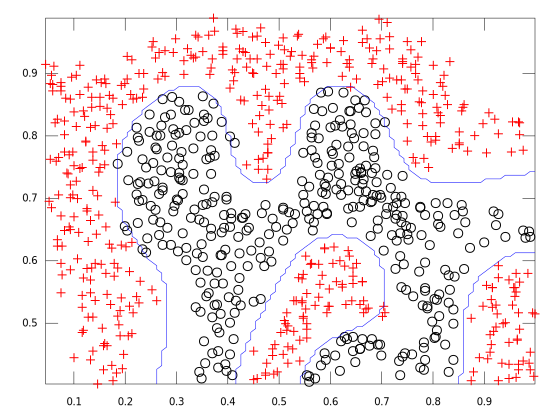

In [36]:
C = 1; sigma = 0.1;
model = svmTrain(X, y, C, @(x1, x2) guassianKernel(x1, x2, sigma));
visualizeBoundary(X, y, model)


### SVM Train 3

In [39]:
load('ex6data3.mat')
whos

Variables in the current scope:

   Attr Name        Size                     Bytes  Class
   ==== ====        ====                     =====  ===== 
        C           1x8                         64  double
        X         211x2                       3376  double
        Xval      200x2                       3200  double
        ans         1x2                         16  double
        model       1x1                       7064  struct
        sigma       1x8                         64  double
        y         211x1                       1688  double
        yval      200x1                       1600  double

Total is 1252 elements using 17072 bytes



In [47]:
minErr = 100
c = 1
s = 1

for i = 1:8
    for j = 1:8
        model = svmTrain(X, y, C(i), @(x1, x2) guassianKernel(x1, x2, sigma(j)));
        predictions = svmPredict(model, Xval);
        printf("C = %f, sigma = %f:", C(i), sigma(j));
        verr = mean(double(predictions ~= yval))
        if verr < minErr
            c = C(i);
            s = sigma(j);
            minErr = verr;
        end
    end
end

minErr =  100
c =  1
s =  1

Training ... Done! 

C = 0.001000, sigma = 0.001000:verr =  0.56500

Training ... Done! 

C = 0.001000, sigma = 0.003000:verr =  0.43500

Training ... Done! 

C = 0.001000, sigma = 0.100000:verr =  0.43500

Training ... Done! 

C = 0.001000, sigma = 0.300000:verr =  0.43500

Training ... Done! 

C = 0.001000, sigma = 1.000000:verr =  0.43500

Training ... Done! 

C = 0.001000, sigma = 3.000000:verr =  0.56500

Training ... Done! 

C = 0.001000, sigma = 10.000000:verr =  0.56500

Training ... Done! 

C = 0.001000, sigma = 30.000000:verr =  0.43500

Training ... Done! 

C = 0.003000, sigma = 0.001000:verr =  0.56500

Training ... Done! 

C = 0.003000, sigma = 0.003000:verr =  0.56500

Training ... Done! 

C = 0.003000, sigma = 0.100000:verr =  0.56500

Training ... Done! 

C = 0.003000, sigma = 0.300000:verr =  0.56500

Training ... Done! 

C = 0.003000, sigma = 1.000000:verr =  0.56500

Training ... Done! 

C = 0.003000, sigma = 3.000000:verr =  0.43500

Tra

In [49]:
c 
s
minErr

c =  0.30000
s =  0.10000
minErr =  0.035000
